In [1]:
import sys
sys.path.append('/Users/AFischer/PycharmProjects/cocoon-project')
sys.path.append('/Users/AFischer/PycharmProjects/cocoon-project/src_pre_term_database')

In [2]:
import scipy.io
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import json
from io import StringIO
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from src_pre_term_database.data_processing_and_feature_engineering import butter_bandpass_filter
from src_pre_term_database.ehg_record import EHGRecord

In [3]:
data_path = '/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/mat_files'

In [4]:
# This is very computationally expensive as about 400.000 data points have to be plotted
def plot_ehg_data(path_to_data: str, 
                  time_units: str, **kwargs):
    """"Plot the EHG signal data of one patient (rec_id).

    Parameters
    ----------
    path_to_data : str
        Path to folder with the term-preterm database files.
    time_units : str
        The x axis unit. Allowed options are: 'samples', 'seconds', 'minutes',
        and 'hours'.
    kwargs:
        Dictionary of parameters to pass to make_subplots.update_xaxes()

    Returns
    -------
    type : plotly.graph_objs
        Line plot of the EHG signal data of one record id.
    """
    record = EHGRecord(path_to_data)

    # TO DO: Write functionality to input a flexible number of channels you want to plot and create
    # the color codes and grid accordingly
    colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)']

    channel_data = ['channel_1', 
                    'channel_2', 
                    'channel_3']

    min_value_signal = -0.5
    max_value_signal = 0.7

    line_size = 2
    grid = [(1, 1), (2, 1), (3, 1)]

    # Construct time indices for the x-axis
    if time_units == 'samples':
        t = np.linspace(0, record.sig_len_ehg-1, record.sig_len_ehg)
    else:
        downsample_factor = {'seconds': record.fs_ehg, 'minutes': record.fs_ehg * 60,
                             'hours': record.fs_ehg * 3600}
        t = np.linspace(0, record.sig_len_ehg-1, record.sig_len_ehg) / downsample_factor[time_units]

    # We plot each channel in a separate subplot
    fig = make_subplots(rows=3, cols=1,
                        subplot_titles=channel_data)

    for index, name in enumerate(channel_data):
        fig.add_trace(go.Scatter(x=t, y=record.ehg_signals[:, index]/1000000, mode='lines',
                                 name=name, line=dict(color=colors[index], width=line_size),
                                 connectgaps=True),
                      row=grid[index][0],
                      col=grid[index][1])
        fig.update_yaxes(title_text=record.unit_ehg)

    fig.update_layout(template='plotly_white', height=1100, showlegend=False,
                      title=dict(
                          text=f'<b>EHG data</b>',
                          x=0.5,
                          y=0.98,
                          font=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
                      )
                      )
    # dtick indicates the tick step and is set in such way that we have approx. 5 ticks on the x axis
    if 'range' in kwargs:
        dtick = int(np.diff(kwargs['range']) / 5)
    else:
        dtick = int(max(t) / 5)

    fig.update_xaxes(title_text=f'{time_units}', tick0=0, dtick=dtick, **kwargs)
    fig.show()

In [49]:
test_record1 = data_path + "/Hopper-2021_09_07_14_13_48-0000010181-0003.mat"
test_record2 = data_path + "/Hopper-2021_09_26_09_08_04-0000010090-0003.mat"
test_record3 = data_path + "/Hopper-2021_09_30_12_50_40-0000010090-0004.mat"
test_record4 = data_path + "/Hopper-2021_10_09_18_11_08-0000010090-0005.mat"

In [50]:
test_record5 = data_path + "/Hopper-2021_11_08_10_21_56-0000010090-0002.mat"
test_record6 = data_path + "/Hopper-2021_11_18_15_50_57-0000010090-0004.mat"
test_record7 = data_path + "/Hopper-2021_11_19_13_42_44-0000010090-0005.mat"
test_record8 = data_path + "/Hopper-2021_11_17_01_37_39-0000010090-0003.mat"

In [26]:
test_record9 = data_path + "/Hopper-2021_11_25_11_02_15-0000010181-0004.mat"
test_record10 = data_path + "/Hopper-2021_11_26_20_26_59-0000010181-0006.mat"
test_record11 = data_path + "/Hopper-2022_02_07_09_47_42-0000010181-0010.mat"
test_record12 = data_path + "/Hopper-2022_02_08_15_07_31-0000010181-0011.mat"

In [10]:
# This is a very large file, probably the recording has not been stopped after an hour
test_record13 = data_path + "/Hopper-2022_02_10_06_02_17-0000010181-0012.mat"

In [ ]:
test_record16 = data_path + "/Hopper-"

In [5]:
# This is a very large file, probably the recording has not been stopped after an hour
test_record22 = data_path + "/Hopper-2022_03_29_14_08_51-0000010090-0003.mat"

In [16]:
test_record1 = EHGRecord(test_record1, bandwidth = [0.08, 4], order=4)
test_record2 = EHGRecord(test_record2, bandwidth = [0.08, 4], order=4)
test_record3 = EHGRecord(test_record3, bandwidth = [0.08, 4], order=4)
test_record4 = EHGRecord(test_record4, bandwidth = [0.08, 4], order=4)

In [6]:
test_record22 = EHGRecord(test_record22, bandwidth = [0.08, 4], order=4)

In [12]:
len(test_record13.ehg_signals)

12593536

In [7]:
len(test_record22.ehg_signals)

11366528

In [7]:
test_record1.ehg_signals

array([[ 0.00000000e+00, -1.14440918e-01,  0.00000000e+00,
         0.00000000e+00, -1.14440918e-01,  1.14440918e-01],
       [-8.01086426e+00,  9.84191895e+00, -1.00708008e+01,
        -2.05993652e+00,  1.78527832e+01, -1.99127197e+01],
       [-1.04141235e+01,  1.32751465e+01, -1.33895874e+01,
        -2.97546387e+00,  2.36892700e+01, -2.66647339e+01],
       ...,
       [-2.40325928e+02, -2.37236023e+02, -1.78413391e+02,
         6.19125366e+01,  3.08990479e+00,  5.88226318e+01],
       [-5.80215454e+01, -5.47027588e+01, -1.16729736e+02,
        -5.87081909e+01,  3.31878662e+00, -6.20269775e+01],
       [-1.64909363e+02, -1.65710449e+02, -1.33323669e+02,
         3.15856934e+01, -8.01086426e-01,  3.23867798e+01]], dtype=float32)

In [26]:
test_record1.ehg_signals

array([[ 0.00000000e+00, -1.14440918e-01,  0.00000000e+00,
         0.00000000e+00, -1.14440918e-01,  1.14440918e-01],
       [-8.01086426e+00,  9.84191895e+00, -1.00708008e+01,
        -2.05993652e+00,  1.78527832e+01, -1.99127197e+01],
       [-1.04141235e+01,  1.32751465e+01, -1.33895874e+01,
        -2.97546387e+00,  2.36892700e+01, -2.66647339e+01],
       ...,
       [-2.40325928e+02, -2.37236023e+02, -1.78413391e+02,
         6.19125366e+01,  3.08990479e+00,  5.88226318e+01],
       [-5.80215454e+01, -5.47027588e+01, -1.16729736e+02,
        -5.87081909e+01,  3.31878662e+00, -6.20269775e+01],
       [-1.64909363e+02, -1.65710449e+02, -1.33323669e+02,
         3.15856934e+01, -8.01086426e-01,  3.23867798e+01]], dtype=float32)

In [51]:
test_record2 = EHGRecord(test_record2, bandwidth = [0.34, 1], order=4)
test_record3 = EHGRecord(test_record3, bandwidth = [0.34, 1], order=4)
test_record5 = EHGRecord(test_record5, bandwidth = [0.34, 1], order=4)
#test_record6 = EHGRecord(test_record6, bandwidth = [0.34, 1], order=4)
#test_record7 = EHGRecord(test_record7, bandwidth = [0.34, 1], order=4)
#test_record8 = EHGRecord(test_record8, bandwidth = [0.34, 1], order=4)

In [10]:
test_record1.ehg_signals

array([[ 0.00000000e+00, -1.14440918e-04,  0.00000000e+00],
       [-8.01086426e-03,  9.84191895e-03, -1.00708008e-02],
       [-1.04141235e-02,  1.32751465e-02, -1.33895874e-02],
       ...,
       [-2.40325928e-01, -2.37236023e-01, -1.78413391e-01],
       [-5.80215454e-02, -5.47027588e-02, -1.16729736e-01],
       [-1.64909363e-01, -1.65710449e-01, -1.33323669e-01]], dtype=float32)

In [28]:
test_record11 = EHGRecord(test_record11, bandwidth = [0.08, 4], order=4)
test_record12 = EHGRecord(test_record12, bandwidth = [0.08, 4], order=4)

Opname wegens contracties: 110001, 110009, 110010, 110019

Opname wegens PPROM: 110005, 110009, 110011, 110019, 110022 

Opname met cvx lengte < 10 mm: 110002, 110003, 110005, 110016, 110019, 110022

In [29]:
test_record1 = data_path + "/Hopper-2021_09_07_14_13_48-0000010181-0003.mat"
test_record9 = data_path + "/Hopper-2021_11_25_11_02_15-0000010181-0004.mat"
test_record10 = data_path + "/Hopper-2021_11_26_20_26_59-0000010181-0006.mat"
test_record19 = data_path + "/Hopper-2022_03_08_07_52_29-0000010090-0006.mat"

In [30]:
test_record1 = EHGRecord(test_record1, bandwidth = [0.34, 1], order=4)
test_record9 = EHGRecord(test_record9, bandwidth = [0.34, 1], order=4)
test_record10 = EHGRecord(test_record10, bandwidth = [0.34, 1], order=4)
test_record19 = EHGRecord(test_record19, bandwidth = [0.34, 1], order=4)

In [38]:
test_record5 = data_path + "/Hopper-2021_11_08_10_21_56-0000010090-0002.mat"
test_record9 = data_path + "/Hopper-2021_11_25_11_02_15-0000010181-0004.mat"
test_record11 = data_path + "/Hopper-2022_02_07_09_47_42-0000010181-0010.mat"
test_record19 = data_path + "/Hopper-2022_03_08_07_52_29-0000010090-0006.mat"
test_record22 = data_path + "/Hopper-2022_03_29_14_08_51-0000010090-0003.mat" # recording has not been stopped aftr one hour


In [40]:
test_record22 = EHGRecord(test_record22, bandwidth = [0.34, 1], order=4)

In [23]:
test_record5 = EHGRecord(test_record5, bandwidth = [0.34, 1], order=4)



In [9]:
test_record1.ehg_signals_filt

array([[-1.35917408e+02,  8.02147634e+01, -1.53197335e+02,
        -1.79021612e+01,  2.16875633e+02, -2.38268863e+02],
       [-1.63647551e+02,  1.24272681e+02, -1.96929648e+02,
        -3.38972418e+01,  2.88737437e+02, -3.26055471e+02],
       [-1.91257616e+02,  1.68276421e+02, -2.40554264e+02,
        -4.99046390e+01,  3.60424879e+02, -4.13678059e+02],
       ...,
       [-3.59055355e-01, -3.41614692e-01, -3.21885453e-01,
         3.68004189e-02,  1.54607924e-02,  2.14337312e-02],
       [-3.08390699e-01, -2.93572714e-01, -2.76523936e-01,
         3.15532700e-02,  1.31248031e-02,  1.85087379e-02],
       [-2.63123710e-01, -2.50616674e-01, -2.35984767e-01,
         2.68747041e-02,  1.10685041e-02,  1.58742245e-02]])

In [6]:
def create_df_ehg_signals(record, time_units: str):
    
    # Construct time indices for the x-axis
    if time_units == 'samples':
        t = np.linspace(0, record.sig_len_ehg-1, record.sig_len_ehg)
    else:
        downsample_factor = {'seconds': record.fs_ehg, 'minutes': record.fs_ehg * 60,
                             'hours': record.fs_ehg * 3600}
        t = np.linspace(0, record.sig_len_ehg-1, record.sig_len_ehg) / downsample_factor[time_units]

    df_record = pd.concat([pd.DataFrame(record.ehg_signals, columns=['Channel 1', 'Channel 2', 'Channel 3', 
                                                                     'Channel 4', 'Channel 5', 'Channel 6']), 
                           pd.DataFrame(record.ehg_signals_filt, columns=['Channel 1 filt', 'Channel 2 filt', 
                                                                          'Channel 3 filt', 'Channel 4 filt', 
                                                                          'Channel 5 filt', 'Channel 6 filt']),
                           pd.DataFrame(t, columns=['minutes'])], axis=1)
    
    return df_record
    

In [26]:
test_record30 = data_path + "/Hopper-2022_05_20_07_00_31-0000010181-0006.mat"
test_record31 = data_path + "/Hopper-2022_05_19_15_52_29-0000010181-0005.mat"
test_record32 = data_path + "/Hopper-2022_04_27_18_22_22-0000010090-0002.mat"
test_record33 = data_path + "/Hopper-2022_04_06_20_55_55-0000010181-0002.mat"

In [27]:
test_record30_3Hz = EHGRecord(test_record30, bandwidth = [0.3, 3], order=4)
test_record31_3Hz = EHGRecord(test_record31, bandwidth = [0.3, 3], order=4)
test_record33_3Hz = EHGRecord(test_record33, bandwidth = [0.3, 3], order=4)

In [28]:
df_test_record30_3Hz = create_df_ehg_signals(test_record30_3Hz, 'minutes')
df_test_record31_3Hz = create_df_ehg_signals(test_record31_3Hz, 'minutes')
df_test_record33_3Hz = create_df_ehg_signals(test_record33_3Hz, 'minutes')

In [29]:
df_test_record30_3Hz.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record30_3Hz.csv')
df_test_record31_3Hz.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record31_3Hz.csv')
df_test_record33_3Hz.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record33_3Hz.csv')

In [4]:
test_record34 = data_path + "/Hopper-2022_05_31_16_33_27-0000010181-0002.mat"
test_record34 = EHGRecord(test_record34, bandwidth = [0.34, 1], order=4)

In [7]:
df_test_record34 = create_df_ehg_signals(test_record34, 'minutes')
df_test_record34.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record34.csv')

In [23]:
test_record30_4Hz = EHGRecord(test_record30, bandwidth = [0.08, 4], order=4)
test_record31_4Hz = EHGRecord(test_record31, bandwidth = [0.08, 4], order=4)
test_record33_4Hz = EHGRecord(test_record33, bandwidth = [0.08, 4], order=4)

In [24]:
df_test_record30_4Hz = create_df_ehg_signals(test_record30_4Hz, 'minutes')
df_test_record31_4Hz = create_df_ehg_signals(test_record31_4Hz, 'minutes')
df_test_record33_4Hz = create_df_ehg_signals(test_record33_4Hz, 'minutes')

In [25]:
df_test_record30_4Hz.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record30_4Hz.csv')
df_test_record31_4Hz.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record31_4Hz.csv')
df_test_record33_4Hz.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record33_4Hz.csv')

In [20]:
test_record30 = EHGRecord(test_record30, bandwidth = [0.34, 1], order=4)
test_record31 = EHGRecord(test_record31, bandwidth = [0.34, 1], order=4)
test_record32 = EHGRecord(test_record32, bandwidth = [0.34, 1], order=4)
test_record33 = EHGRecord(test_record33, bandwidth = [0.34, 1], order=4)

In [9]:
df_test_record30 = create_df_ehg_signals(test_record30, 'minutes')
df_test_record31 = create_df_ehg_signals(test_record31, 'minutes')
df_test_record32 = create_df_ehg_signals(test_record32, 'minutes')
df_test_record33 = create_df_ehg_signals(test_record33, 'minutes')

In [15]:
df_test_record30.head()

,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 1 filt,Channel 2 filt,Channel 3 filt,Channel 4 filt,Channel 5 filt,Channel 6 filt,minutes
0,0.000000,0.000000,-0.114441,-0.114441,0.0,-0.114441,1.803884,1.010778,0.166309,-4.951420,0.622475,-4.991909,0.000000
1,-10.070801,-10.070801,9.841919,19.912720,0.0,19.912720,-37.677176,-38.461905,39.504158,73.809088,0.635771,73.724408,0.000130
2,-13.389587,-13.389587,13.275146,26.664734,0.0,26.664734,-77.109983,-77.886122,78.793114,152.472813,0.648953,152.344284,0.000260
3,29.869080,29.869080,-29.754639,-59.623718,0.0,-59.623718,-116.445923,-117.213264,117.984775,230.942788,0.662017,230.770772,0.000391
4,-62.141418,-62.141418,61.798096,123.939514,0.0,123.939514,-155.636547,-156.394887,157.030912,309.122383,0.674957,308.907263,0.000521


In [10]:
df_test_record30.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record30.csv')
df_test_record31.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record31.csv')
df_test_record32.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record32.csv')
df_test_record33.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record33.csv')

In [11]:
def create_df_acc_signals(record, time_units: str):
    
    # Construct time indices for the x-axis
    if time_units == 'samples':
        t = np.linspace(0, record.sig_len_acc-1, record.sig_len_acc)
    else:
        downsample_factor = {'seconds': record.fs_acc, 'minutes': record.fs_acc * 60,
                             'hours': record.fs_acc * 3600}
        t = np.linspace(0, record.sig_len_acc-1, record.sig_len_acc) / downsample_factor[time_units]

    df_record = pd.concat([pd.DataFrame(record.acc_signals, columns=['x axis', 'y axis', 'z axis']), pd.DataFrame(t, columns=['minutes'])], axis=1)
    
    return df_record

In [12]:
df_acc_record30 = create_df_acc_signals(test_record30, 'minutes')
df_acc_record31 = create_df_acc_signals(test_record31, 'minutes')
df_acc_record32 = create_df_acc_signals(test_record32, 'minutes')
df_acc_record33 = create_df_acc_signals(test_record33, 'minutes')

In [14]:
df_acc_record30.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_acc_record30.csv')
df_acc_record31.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_acc_record31.csv')
df_acc_record32.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_acc_record32.csv')
df_acc_record33.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_acc_record33.csv')

In [11]:
df_test_record1 = create_df_ehg_signals(test_record1, 'minutes')

In [12]:
df_test_record1.head()

,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 1 filt,Channel 2 filt,Channel 3 filt,Channel 4 filt,Channel 5 filt,Channel 6 filt,minutes
0,0.000000,-0.114441,0.000000,0.000000,-0.114441,0.114441,-135.917408,80.214763,-153.197335,-17.902161,216.875633,-238.268863,0.000000
1,-8.010864,9.841919,-10.070801,-2.059937,17.852783,-19.912720,-163.647551,124.272681,-196.929648,-33.897242,288.737437,-326.055471,0.000130
2,-10.414124,13.275146,-13.389587,-2.975464,23.689270,-26.664734,-191.257616,168.276421,-240.554264,-49.904639,360.424879,-413.678059,0.000260
3,23.117065,-29.754639,29.869080,6.752014,-52.871704,59.623718,-218.712115,212.172772,-284.017216,-65.905877,431.849231,-501.029446,0.000391
4,-48.408508,61.798096,-62.141418,-13.732910,110.206604,-123.939514,-245.975749,255.908635,-327.264702,-81.882453,502.922072,-588.002733,0.000521


In [18]:
df_test_record1.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record1.csv')

In [52]:
df_test_record2 = create_df_ehg_signals(test_record2, 'minutes')

In [53]:
df_test_record2.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record2.csv')

In [54]:
df_test_record3 = create_df_ehg_signals(test_record3, 'minutes')

In [55]:
df_test_record3.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record3.csv')

In [31]:
df_test_record4 = create_df_ehg_signals(test_record4, 'minutes')

In [24]:
df_test_record5 = create_df_ehg_signals(test_record5, 'minutes')

In [25]:
df_test_record5.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record5.csv')

In [35]:
df_test_record6 = create_df_ehg_signals(test_record6, 'minutes')

In [36]:
df_test_record7 = create_df_ehg_signals(test_record7, 'minutes')

In [37]:
df_test_record8 = create_df_ehg_signals(test_record8, 'minutes')

In [31]:
df_test_record9 = create_df_ehg_signals(test_record9, 'minutes')

In [32]:
df_test_record9.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record9.csv')

In [33]:
df_test_record10 = create_df_ehg_signals(test_record10, 'minutes')

In [34]:
df_test_record10.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record10.csv')


In [29]:
df_test_record11 = create_df_ehg_signals(test_record11, 'minutes')

In [30]:
df_test_record12 = create_df_ehg_signals(test_record12, 'minutes')

In [16]:
df_test_record13 = create_df_ehg_signals(test_record13, 'minutes')

The recording of record13 has not been properly detached after the recording was done. The total recording is now 26 hours, we keep the first 3 hours.

In [24]:
df_test_record13 = df_test_record13[df_test_record13['minutes']<=180].reset_index(drop=True)

The recording of record22 has not been properly detached after the recording was done. Based on the notes in the EHR the recording took 1.5 hours (from 16:00-17:30). This is supported by the accelerometer data, which shows a flat line after 90 minutes. We keep the first 1.5 hours of the recording.

In [35]:
df_test_record19 = create_df_ehg_signals(test_record19, 'minutes')

In [36]:
df_test_record19.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record19.csv')


In [41]:
df_test_record22 = create_df_ehg_signals(test_record22, 'minutes')

In [42]:
df_test_record22 = df_test_record22[df_test_record22['minutes']<=90].reset_index(drop=True)

In [43]:
df_test_record22.to_csv('/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/df_record22.csv')



In [25]:
test_record22.fs_ehg

128.0

In [27]:
from plotnine import *

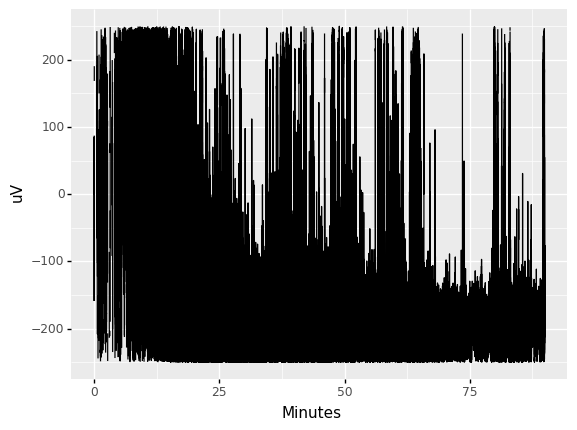

<ggplot: (8774647192742)>

In [41]:
(
    ggplot(df_test_record22.query('minutes < 90'), aes(x='minutes', y='Channel 1'))
    + geom_line() # line plot
    + labs(x='Minutes', y='uV')
    + ylim(-250, 250)
)

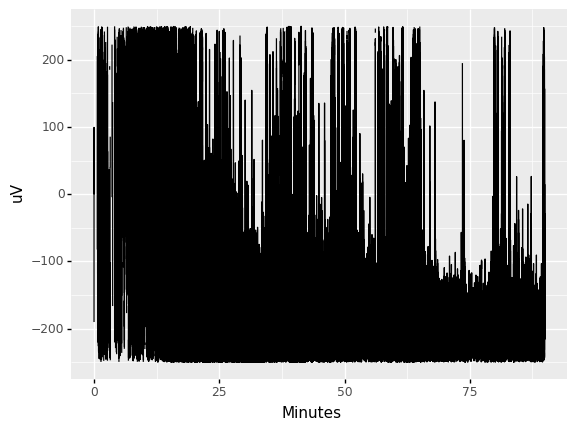

<ggplot: (8774695058294)>

In [42]:
(
    ggplot(df_test_record22.query('minutes < 90'), aes(x='minutes', y='Channel 2'))
    + geom_line() # line plot
    + labs(x='Minutes', y='uV')
    + ylim(-250, 250)
)

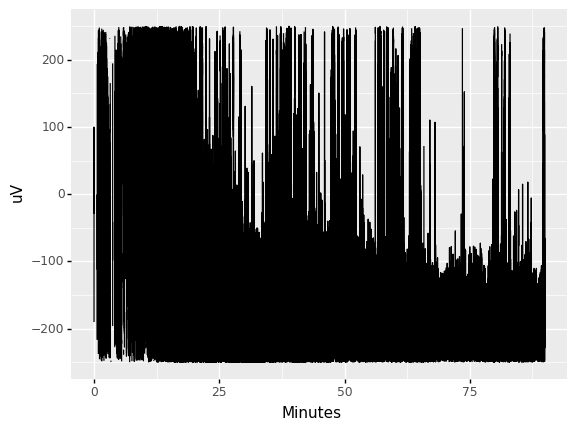

<ggplot: (8774593062545)>

In [43]:
(
    ggplot(df_test_record22.query('minutes < 90'), aes(x='minutes', y='Channel 3'))
    + geom_line() # line plot
    + labs(x='Minutes', y='uV')
    + ylim(-250, 250)
)

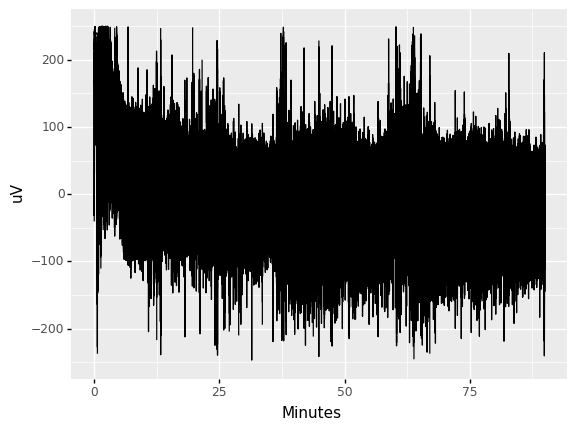

<ggplot: (8774073030765)>

In [44]:
(
    ggplot(df_test_record22.query('minutes < 90'), aes(x='minutes', y='Channel 4'))
    + geom_line() # line plot
    + labs(x='Minutes', y='uV')
    + ylim(-250, 250)
)

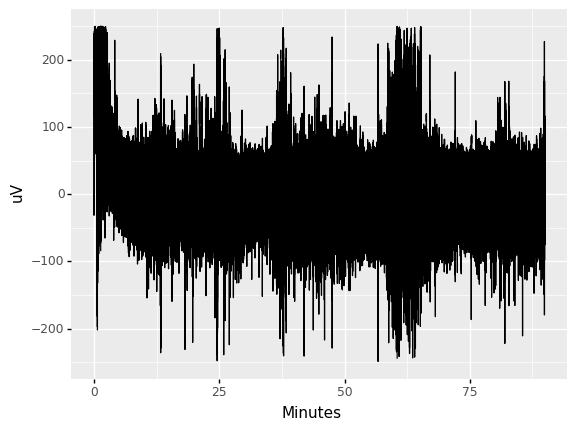

<ggplot: (8773984806464)>

In [45]:
(
    ggplot(df_test_record22.query('minutes < 90'), aes(x='minutes', y='Channel 5'))
    + geom_line() # line plot
    + labs(x='Minutes', y='uV')
    + ylim(-250, 250)
)

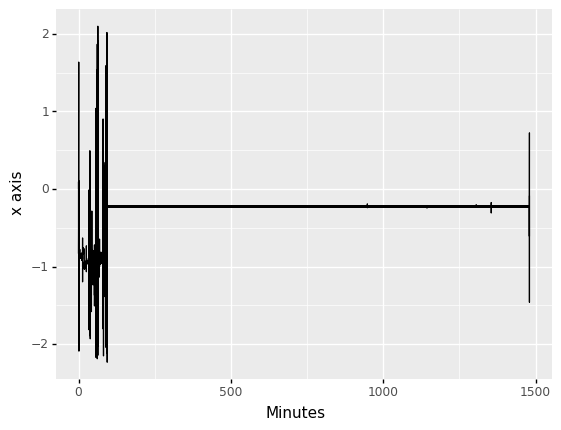

<ggplot: (8773992461011)>

In [51]:
(
    ggplot(df_acc_record22, aes(x='minutes', y='x axis'))
    + geom_line() # line plot
    + labs(x='Minutes')
)

In [19]:
CSV_DATA_PATH = '/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/csv_files/'

In [41]:
df_test_record1.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_record1.csv')
df_test_record2.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_record2.csv')
df_test_record3.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_record3.csv')
df_test_record4.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_record4.csv')

In [42]:
df_test_record5.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_record5.csv')
df_test_record6.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_record6.csv')
df_test_record7.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_record7.csv')
df_test_record8.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_record8.csv')

In [31]:
df_test_record11.to_csv(f'{CSV_DATA_PATH}df_record11.csv')
df_test_record12.to_csv(f'{CSV_DATA_PATH}df_record12.csv')

In [25]:
df_test_record13.to_csv(f'{CSV_DATA_PATH}df_record13.csv')

In [19]:
test_record1.acc_signals[:, 0]

309568

In [25]:
test_record5.fs_acc

64.0

In [19]:
df_acc_record1 = create_df_acc_signals(test_record1, 'minutes')
df_acc_record2 = create_df_acc_signals(test_record2, 'minutes')
df_acc_record3 = create_df_acc_signals(test_record3, 'minutes')
df_acc_record4 = create_df_acc_signals(test_record4, 'minutes')

In [49]:
df_acc_record22 = create_df_acc_signals(test_record22, 'minutes')

In [20]:
df_acc_record1

,x axis,y axis,z axis,minutes
0,-0.000488,-0.000488,0.000488,0.000000
1,0.005859,0.000488,-0.002441,0.000260
2,-0.019531,-0.004395,0.010254,0.000521
3,0.054199,0.015625,-0.033691,0.000781
4,-0.139648,-0.118164,-0.024414,0.001042
...,...,...,...,...
309563,0.201660,-0.685547,-0.719727,80.615365
309564,0.264648,-0.794433,-0.687988,80.615625
309565,0.295898,-0.837891,-0.647461,80.615885
309566,0.238281,-0.741211,-0.592773,80.616146


In [22]:
df_acc_record1.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_acc_record1.csv')
df_acc_record2.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_acc_record2.csv')
df_acc_record3.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_acc_record3.csv')
df_acc_record4.to_csv('C:/Users/AFischer/Documents/PhD_onderzoek/data_cocoon_studie/df_acc_record4.csv')

In [27]:
def plot_acc_data(path_to_data: str, 
                  time_units: str, **kwargs):
    """"Plot the EHG signal data of one patient (rec_id).

    Parameters
    ----------
    path_to_data : str
        Path to folder with the term-preterm database files.
    time_units : str
        The x axis unit. Allowed options are: 'samples', 'seconds', 'minutes',
        and 'hours'.
    kwargs:
        Dictionary of parameters to pass to make_subplots.update_xaxes()

    Returns
    -------
    type : plotly.graph_objs
        Line plot of the EHG signal data of one record id.
    """
    record = EHGRecord(path_to_data)

    # TO DO: Write functionality to input a flexible number of channels you want to plot and create
    # the color codes and grid accordingly
    colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)']

    axis_data = ['x axis', 'y axis', 'z axis']

    min_value_signal = -0.5
    max_value_signal = 0.7

    line_size = 2
    grid = [(1, 1), (2, 1), (3, 1)]

    # Construct time indices for the x-axis
    if time_units == 'samples':
        t = np.linspace(0, record.sig_len_acc-1, record.sig_len_acc)
    else:
        downsample_factor = {'seconds': record.fs_acc, 'minutes': record.fs_acc * 60,
                             'hours': record.fs_acc * 3600}
        t = np.linspace(0, record.sig_len_acc-1, record.sig_len_acc) / downsample_factor[time_units]

    # We plot each channel in a separate subplot
    fig = make_subplots(rows=3, cols=1, subplot_titles=axis_data)

    for index, axis in enumerate(axis_data):
        fig.add_trace(go.Scatter(x=t, y=record.acc_signals[:, index], mode='lines',
                                 name=axis, line=dict(color=colors[index], width=line_size),
                                 connectgaps=True),
                      row=grid[index][0],
                      col=grid[index][1])
        fig.update_yaxes(title_text=record.unit_acc)

    fig.update_layout(template='plotly_white', height=1100, showlegend=False,
                      title=dict(
                          text=f'<b>Accelerometer</b>',
                          x=0.5,
                          y=0.98,
                          font=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
                      )
                      )
    # dtick indicates the tick step and is set in such way that we have approx. 5 ticks on the x axis
    if 'range' in kwargs:
        dtick = int(np.diff(kwargs['range']) / 5)
    else:
        dtick = int(max(t) / 5)

    fig.update_xaxes(title_text=f'{time_units}', tick0=0, dtick=dtick, **kwargs)
    fig.show()

In [ ]:
test_record1 = data_path + "/Hopper-2021_09_07_14_13_48-0000010181-0003.mat"
plot_acc_data(test_record1, 'minutes')

In [197]:
fs = {}
for i, signal_spec in enumerate(signals_specs_list):
    signals_dict = signals_specs_list[i]
    
    if signals_dict.get('name') == 'exg':
        fs_ehg_dict = signals_dict['sample_rate']
        fs_ehg = fs_ehg_dict['numerator'] / fs_ehg_dict['denominator']
        fs['fs_ehg'] = fs_ehg
        
    elif signals_dict.get('name') == 'acceleration':
        fs_acc_dict = signals_dict['sample_rate']
        fs_acc = fs_acc_dict['numerator'] / fs_acc_dict['denominator']
        fs['fs_acc'] = fs_acc
    
    elif signals_dict.get('name') == 'clipping':
        fs_clipping_dict = signals_dict['sample_rate']
        fs_clipping = fs_clipping_dict['numerator'] / fs_clipping_dict['denominator']
        fs['fs_clipping'] = fs_clipping

    

In [198]:
fs

{'fs_ehg': 128.0, 'fs_acc': 64.0, 'fs_clipping': 4.0}

In [192]:
fs_ehg_dict

{'numerator': 128, 'denominator': 1}

In [194]:
fs_ehg

128.0

In [98]:
mat['acceleration_adxl362']

array([[-4.8828119e-04, -4.8828119e-04,  4.8828119e-04],
       [ 5.8593741e-03,  4.8828119e-04, -2.4414060e-03],
       [-1.9531248e-02, -4.3945308e-03,  1.0253905e-02],
       ...,
       [ 2.9589841e-01, -8.3789051e-01, -6.4746088e-01],
       [ 2.3828122e-01, -7.4121088e-01, -5.9277338e-01],
       [ 1.6845702e-01, -7.4365228e-01, -5.0634760e-01]], dtype=float32)

In [101]:
mat['polarization_voltage_sam4sd32c_adc']

array([[0.4392552 , 0.4453602 , 0.44627595, 0.43894994],
       [0.46672773, 0.47222224, 0.47283274, 0.46703297],
       [0.48137975, 0.48717952, 0.48779002, 0.4822955 ],
       ...,
       [0.5100733 , 0.51159954, 0.5180098 , 0.50427353],
       [0.509768  , 0.5112943 , 0.518315  , 0.50427353],
       [0.5094628 , 0.510989  , 0.5180098 , 0.504884  ]], dtype=float32)

In [30]:
type(mat['exg_afe2q'])

numpy.ndarray

In [69]:
mat['header'][0]

'{"data_file_header": {"id": 3, "time": {"utc_time": 1631024028, "utc_time_offset": 7200}, "sensor_info": {"sensor": {"hardware_part": "100-0044-02", "hardware_revision": "A", "serial_number": "0000010181", "maxim_hs_sd_reader_serial_number": ""}, "version": {"firmware_version": "1.15.0", "algorithm_version": "2.10.4", "softdevice_version": "", "bootloader_version": ""}, "hardware": {"backend_processor_id": [1395994880, 1346455374, 875574577, 959721520], "frontend_processor_id": [0, 0, 0, 0]}}, "sensor_config": {"created": {"utc_time": 1630678310, "utc_time_offset": 7200}, "mode": "data_logger", "maximum_session_duration_seconds": 0, "firestore": {"user_id": "", "pregnancy_id": "", "email": "", "procedure_id": ""}, "study": {"study_id": "", "participant_id": ""}, "maximum_session_count": 0}, "payload_info": {"block_duration_seconds": {"numerator": 1, "denominator": 1}, "bytes_per_block": 1182, "signals": [{"name": "exg", "source": "afe2q", "unit": "volt", "power": "micro", "data_type":